In [2]:
import numpy as np
import matplotlib.pyplot as plt

## plotting a scatter plot with matplotlib

First we need some data points to plot. `x_train` and `y_train` are the series of values along the x and y axes respectively. We store them as a numpy array. Numpy arrays have a `.shape` parameter that returns a tupe with the len of each dimension. In this case it's only a one-dimensional array. And its length willl be, for example:

`x_train.shape[0]`

In [3]:
x_train = np.array([1.0, 2.0, 3.0, 5.0, 7.0, 8.0])
y_train = np.array([300.0, 320.0, 500.0, 560.0, 600.0, 800.0])

print(f"xtrain = {x_train}")
print(f"y_train = {y_train}")

print(f"shape of x_train is {x_train.shape}")
print(f"shape of y_train is {y_train.shape}")

print(f"number of data points is {x_train.shape[0]}")


xtrain = [1. 2. 3. 5. 7. 8.]
y_train = [300. 320. 500. 560. 600. 800.]
shape of x_train is (6,)
shape of y_train is (6,)
number of data points is 6


Now we can plot these points using the `scatter()` function of the `matplotlib` library

Text(0, 0.5, 'y axis')

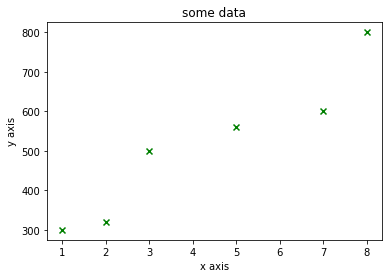

In [4]:
plt.scatter(x_train, y_train, marker='x', c='g')
plt.title("some data")
plt.xlabel("x axis")
plt.ylabel("y axis")

But it doesn't look so good because we need to customize the style. We can try using some of the ones provided with `matplotlib`

In [5]:
# this shows the available styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0, 0.5, 'y axis')

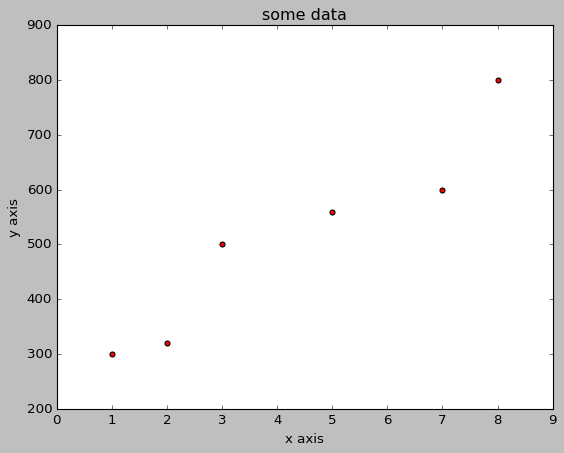

In [6]:
# now we can pick a style and use it with this comand
plt.style.use('classic')

# and then repeat the plot to see how it looks
plt.scatter(x_train, y_train, marker='o', c='r')
plt.title("some data")
plt.xlabel("x axis")
plt.ylabel("y axis")

## Plotting a linear model

we use a linear function $$y^i = wx^i + b$$

and we define a function that plots the actual data points together
with the linear model (for some provided values of w and b) on the same graph


In [7]:

def plot_linear_model(x,y,w,b):
    """
    x and y are equal-length arrays of data points
    w and b are the parameters of the linear model
    """    

    ## get the number of data points in x,y train
    m = x.shape[0]

    ## create a zero-filled array of length m for our y-hat predictions
    y_hats = np.zeros(m)

    ## now for each x value compute the predicted y-hat value
    for i in range(m):
        y_hats[i] = w*x[i] + b

    ## now we can plot the model prediction, which will
    ## be x_train versus y_hats

    plt.plot(x, y_hats, c='b', label='prediction')

    ## and plot the data points for comparison
    plt.scatter(x, y, marker='x', c='r', label='actual data' )
    plt.title("prediction vs data")
    plt.xlabel("x axis")
    plt.ylabel("y axis")

    #plt.legend()
    plt.show()    # doesn't seem to be necessary



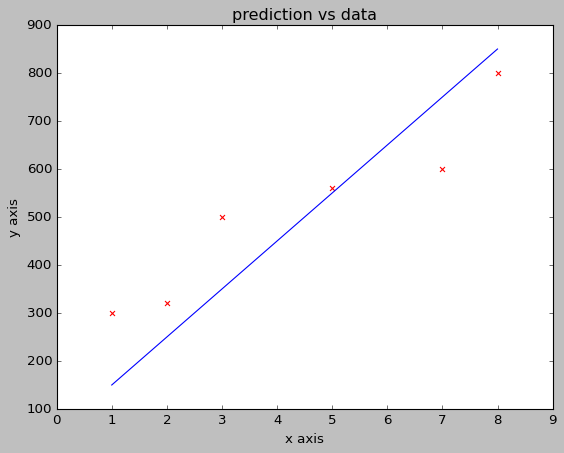

In [8]:
## now try calling the above function 

plot_linear_model(x_train, y_train, 100, 50)

## Cost function

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

In [9]:
def compute_cost(x,y,w,b):
    """
    x and y are arrays of data points
    w and b are the parameters of the linear model
    """
    m = x.shape[0]

    sum=0   #here we will accumulate the summed costs

    for i in range(m):
        y_hat = w*x[i]+b   # predicted y
        y_real = y[i]           # actual y

        err2 = (y_hat - y_real)**2  # squared error
        sum += err2            # add to accumulated sum

    return sum/(2*m)


Let's now pick some values of w and b, and then plot the data with the linear model,
and also compute the cost function

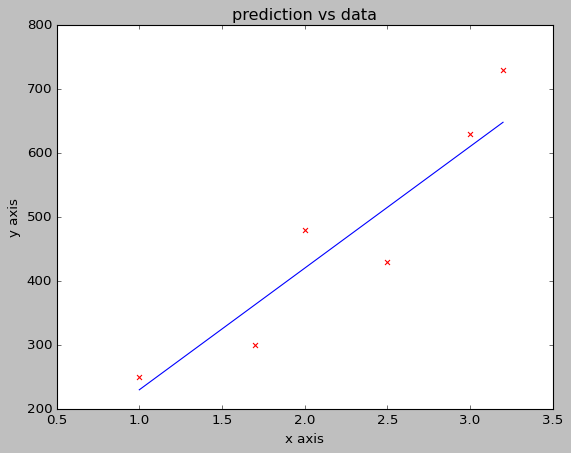

cost = 1860


In [10]:
w = 190
b = 40

## use the values from the lecture
x = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y = np.array([250, 300, 480,  430,   630, 730,])

plot_linear_model(x, y, w, b)  # plot the model and data

# try calling it
c = compute_cost(x, y, w, b)    # compute its cost
print(f"cost = {round(c)}")

Now for this same model and data we can also try to plot the cost function versus one of its parameters, lets keep the b value we had above and try varying w, say from zero to 700

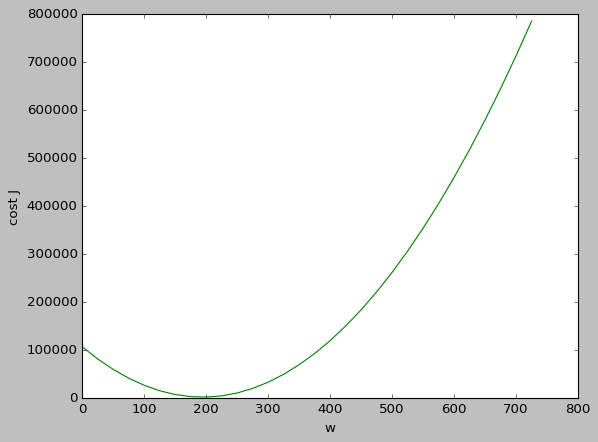

In [12]:
## array of w values (this will be our input variable, on horizontal output)
w_train = np.array([i for i in range(0, 750, 25)])

m = w_train.shape[0]
J_train = np.zeros(m)

for i in range(m):
    # hold x,y and b constant as in previous code block, vary only the w value
    J_train[i] = compute_cost(x,y,w_train[i], b)

plt.plot(w_train, J_train, c='g')
plt.xlabel("w")
plt.ylabel("cost J")
plt.show()


## now do the same for b, holding w constant
b_train = np.array([i for i in range(0, 400, 10)])
m = b_train.shape[0]
J_train = np.zeros(m)
for i in range(m):
    # hold x,y and J constant as in previous code block, vary only the b value
    J_train[i] = compute_cost(x,y,w, b_train)

    plt.plot(b_train, J_train, c='b')
    plt.xlabel("b")
    plt.show()